In [17]:
import yfinance as yf
import pandas as pd 
import sklearn.model_selection as sk
import numpy as np

In [18]:
data = yf.download(' aapl ',period="7D",interval="1m")
data=data.rename({"High":"high","Low":"low","Close":"close","Open":"open","Adj Close":"adj close","Volume":"volume"},axis=1)

data

[*********************100%%**********************]  1 of 1 completed


,open,high,low,close,adj close,volume
Datetime,,,,,,
2023-08-31 09:30:00-04:00,187.839996,188.100006,187.809998,188.089996,188.089996,1444289
2023-08-31 09:31:00-04:00,188.100006,188.339996,188.029999,188.320007,188.320007,240389
2023-08-31 09:32:00-04:00,188.309998,188.369995,188.009995,188.070007,188.070007,227674
2023-08-31 09:33:00-04:00,188.085602,188.259995,187.800003,188.225006,188.225006,285393
2023-08-31 09:34:00-04:00,188.212997,188.270004,187.789993,187.789993,187.789993,184717
...,...,...,...,...,...,...
2023-09-11 15:55:00-04:00,179.309998,179.330002,179.220001,179.247894,179.247894,316547
2023-09-11 15:56:00-04:00,179.244995,179.320007,179.240005,179.270004,179.270004,264829
2023-09-11 15:57:00-04:00,179.264999,179.330002,179.160004,179.264404,179.264404,367792


In [19]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [20]:
device= 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [21]:
from copy import deepcopy as dc
def prepareforlstm(df,loookback):
    df=pd.DataFrame(df["close"])
    df=dc(df)
    for i in range(1,loookback+1):
        df[f'close(t-{i})']=df["close"].shift(i)
    df.dropna(inplace=True)
    return df
lookback=15

In [22]:
shifted_df=prepareforlstm(data,lookback)
shifted_df

,close,close(t-1),close(t-2),close(t-3),close(t-4),close(t-5),close(t-6),close(t-7),close(t-8),close(t-9),close(t-10),close(t-11),close(t-12),close(t-13),close(t-14),close(t-15)
Datetime,,,,,,,,,,,,,,,,
2023-08-31 09:45:00-04:00,188.360001,188.149994,188.029999,188.089996,188.259995,188.100006,188.180099,188.145004,187.925003,187.922897,187.750000,187.789993,188.225006,188.070007,188.320007,188.089996
2023-08-31 09:46:00-04:00,188.158493,188.360001,188.149994,188.029999,188.089996,188.259995,188.100006,188.180099,188.145004,187.925003,187.922897,187.750000,187.789993,188.225006,188.070007,188.320007
2023-08-31 09:47:00-04:00,188.029999,188.158493,188.360001,188.149994,188.029999,188.089996,188.259995,188.100006,188.180099,188.145004,187.925003,187.922897,187.750000,187.789993,188.225006,188.070007
2023-08-31 09:48:00-04:00,187.869995,188.029999,188.158493,188.360001,188.149994,188.029999,188.089996,188.259995,188.100006,188.180099,188.145004,187.925003,187.922897,187.750000,187.789993,188.225006
2023-08-31 09:49:00-04:00,187.910004,187.869995,188.029999,188.158493,188.360001,188.149994,188.029999,188.089996,188.259995,188.100006,188.180099,188.145004,187.925003,187.922897,187.750000,187.789993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-11 15:55:00-04:00,179.247894,179.309998,179.360001,179.339996,179.389999,179.399994,179.609894,179.570007,179.600006,179.664993,179.580002,179.679993,179.649994,179.669998,179.729996,179.750000
2023-09-11 15:56:00-04:00,179.270004,179.247894,179.309998,179.360001,179.339996,179.389999,179.399994,179.609894,179.570007,179.600006,179.664993,179.580002,179.679993,179.649994,179.669998,179.729996
2023-09-11 15:57:00-04:00,179.264404,179.270004,179.247894,179.309998,179.360001,179.339996,179.389999,179.399994,179.609894,179.570007,179.600006,179.664993,179.580002,179.679993,179.649994,179.669998


In [23]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(-1,1))
shifted_df_as_np=scalar.fit_transform(shifted_df)
shifted_df_as_np

array([[ 0.8036536 ,  0.77763853,  0.76277386, ...,  0.76773001,
         0.79869934,  0.77020619],
       [ 0.77869138,  0.8036536 ,  0.77763853, ...,  0.78693084,
         0.76773001,  0.79869934],
       [ 0.76277386,  0.77869138,  0.8036536 , ...,  0.73304262,
         0.78693084,  0.76773001],
       ...,
       [-0.32308457, -0.32239086, -0.32512979, ..., -0.27160259,
        -0.27531876, -0.27284069],
       [-0.29637768, -0.32308457, -0.32239086, ..., -0.28398919,
        -0.27160259, -0.27531876],
       [-0.30876428, -0.29637768, -0.32308457, ..., -0.27346068,
        -0.28398919, -0.27160259]])

In [24]:
x=shifted_df_as_np[:,1:]
y=shifted_df_as_np[:,0]
x.shape,y.shape

((2705, 15), (2705,))

In [25]:
split_index=int(len(x)*0.95)

In [26]:
x[:split_index].reshape((-1,1)).shape ,x[split_index:].reshape((-1,1)).shape

((38535, 1), (2040, 1))

In [27]:
x_train=torch.tensor(x[:split_index].reshape((-1,lookback,1))).float()
x_test=torch.tensor(x[split_index:].reshape((-1,lookback,1))).float()
y_train=torch.tensor(y[:split_index].reshape((-1,1))).float()
y_test=torch.tensor(y[split_index:].reshape((-1,1))).float()
x_train.shape,x_test.shape,y_train.shape,y_test.shape

(torch.Size([2569, 15, 1]),
 torch.Size([136, 15, 1]),
 torch.Size([2569, 1]),
 torch.Size([136, 1]))

In [28]:
from torch.utils.data import Dataset,DataLoader
class TimeSeriesDataset(Dataset):
    def __init__(self,x,y):
        self.x=x
        self.y=y
    def __len__(self):
        return len(self.x)
    def __getitem__(self,i):
        return self.x[i],self.y[i]
    

In [29]:
trainds=TimeSeriesDataset(x_train,y_train)
testds=TimeSeriesDataset(x_test,y_test)

In [30]:
batch_size=16
train_loader=DataLoader(trainds,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(testds,batch_size=batch_size,shuffle=True)

In [31]:
class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.rnn = nn.Conv1d(input_size, hidden_dim, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        
        batch_size = x.size(0)
        h0=torch.zeros(self.n_layers,batch_size,self.hidden_dim,device=x.device)
        out,_=self.rnn(x,h0.detach())
        out=out[:,-1,:]
        out=self.fc(out)
        return out
    


In [32]:
model=Model(1,4,15,1)
model.to(device)
model

TypeError: __init__() got an unexpected keyword argument 'batch_first'

In [ ]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch*1}')
    running_loss=0.0
    for batch_index,batch in enumerate(train_loader):
        x_batch,y_batch=batch[0].to(device),batch[1].to(device)
        output=model(x_batch)
        loss=loss_function(output,y_batch)
        running_loss+=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch_index %100==99:
            avg_loss_across_batches=running_loss/100
            print('Batch {0},loss:{1:.3f}'.format(batch_index+1,avg_loss_across_batches))
            running_loss=0.0
    print()

In [ ]:
def validate_one_epoch():
    model.train(False)
    running_lose=0.0
    for batch_index,batch in enumerate(test_loader):
        x_batch,y_batch=batch[0].to(device),batch[1].to(device)
        with torch.no_grad():
            output=model(x_batch)
            loss=loss_function(output,y_batch)
            running_lose+=loss.item()
    avg_loss_across_batches=running_lose/len(test_loader)
    print('Val loss {0:.3f}'.format(avg_loss_across_batches))
    print('*************************************')
    print()

In [ ]:
learning_rate=0.001
num_epochs=30
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)
for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 0


/home/batuhan-saylam/miniconda3/envs/tf/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Batch 100,loss:0.362

Val loss 0.010
*************************************

Epoch: 1


/home/batuhan-saylam/miniconda3/envs/tf/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/batuhan-saylam/miniconda3/envs/tf/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([8, 1])) that is different to the input size (torch.Size([8, 4])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Batch 100,loss:0.012

Val loss 0.002
*************************************

Epoch: 2
Batch 100,loss:0.008

Val loss 0.002
*************************************

Epoch: 3
Batch 100,loss:0.007

Val loss 0.001
*************************************

Epoch: 4
Batch 100,loss:0.006

Val loss 0.002
*************************************

Epoch: 5
Batch 100,loss:0.007

Val loss 0.001
*************************************

Epoch: 6
Batch 100,loss:0.006

Val loss 0.001
*************************************

Epoch: 7
Batch 100,loss:0.008

Val loss 0.006
*************************************

Epoch: 8
Batch 100,loss:0.007

Val loss 0.001
*************************************

Epoch: 9
Batch 100,loss:0.007

Val loss 0.001
*************************************

Epoch: 10
Batch 100,loss:0.006

Val loss 0.001
*************************************

Epoch: 11
Batch 100,loss:0.006

Val loss 0.001
*************************************

Epoch: 12
Batch 100,loss:0.006

Val loss 0.001
*************************

In [ ]:
with torch.no_grad():
    predicted=model(x_train.to(device)).to('cpu').numpy()
    

In [ ]:
torch.cuda.empty_cache()

In [ ]:
import matplotlib.pyplot as plt

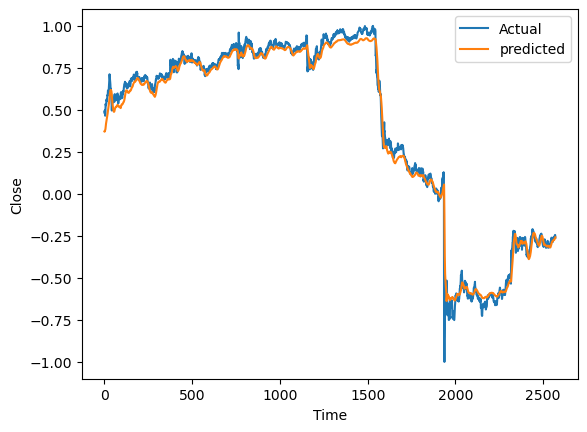

In [ ]:
plt.plot(y_train,label="Actual")
plt.plot(predicted[:,0],label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()

In [ ]:
dummies=np.zeros((x_train.shape[0],lookback+1))
dummies[:,0]=predicted[:,0]
dummies=scalar.inverse_transform(dummies)
train_prediction=dc(dummies[:,0])
train_prediction

array([184.87740261, 184.89971033, 184.88534221, ..., 179.73483868,
       179.7633252 , 179.78797976])

In [ ]:
dummies=np.zeros((x_train.shape[0],lookback+1))
dummies[:,0]=y_train.flatten()
dummies=scalar.inverse_transform(dummies)
new_y_train=dc(dummies[:,0])
new_y_train

array([185.8300019 , 185.74999989, 185.74000551, ..., 179.89999385,
       179.89920042, 179.77000416])

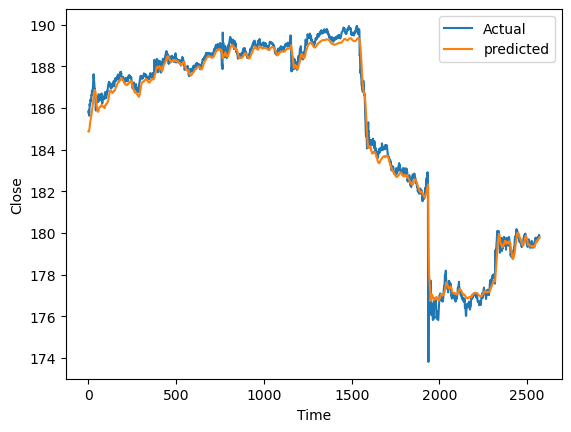

In [ ]:
plt.plot(new_y_train,label="Actual")
plt.plot(train_prediction,label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()

In [ ]:
dummies=np.zeros((x_test.shape[0],lookback+1))
dummies[:,:4]=model(x_test.to(device)).detach().cpu().numpy()
dummies=scalar.inverse_transform(dummies)
test_prediction=dc(dummies[:,0])
test_prediction

array([179.79772708, 179.78679275, 179.791766  , 179.79111307,
       179.78747503, 179.78070176, 179.77974137, 179.76226905,
       179.7433523 , 179.73055926, 179.71397516, 179.69353458,
       179.6702951 , 179.65832484, 179.65690734, 179.65952773,
       179.65735242, 179.66323506, 179.68174523, 179.7015579 ,
       179.71371486, 179.72600268, 179.74240586, 179.74043889,
       179.72460925, 179.72284965, 179.71702859, 179.68973247,
       179.61450765, 179.54380427, 179.46592442, 179.37452497,
       179.27806325, 179.17447125, 179.09853383, 179.04287965,
       178.9936937 , 178.93856543, 178.932524  , 178.91360436,
       178.89402746, 178.86663847, 178.85965686, 178.83586741,
       178.82799951, 178.81352818, 178.80506219, 178.80612026,
       178.77595547, 178.75400742, 178.72995814, 178.7217414 ,
       178.72558393, 178.73032816, 178.71611184, 178.65347125,
       178.57502555, 178.55007844, 178.53907482, 178.5220495 ,
       178.50920161, 178.49577728, 178.5030192 , 178.48

In [ ]:
dummies=np.zeros((x_test.shape[0],lookback+1))
dummies[:,0]=y_test.flatten()
dummies=scalar.inverse_transform(dummies)
new_y_test=dc(dummies[:,0])
new_y_test

array([179.74999999, 179.76499939, 179.74499522, 179.72000119,
       179.73500059, 179.71000681, 179.65499883, 179.59860223,
       179.66499321, 179.61999502, 179.57940664, 179.58959951,
       179.67999261, 179.68600469, 179.71000681, 179.69999702,
       179.74999999, 179.82499698, 179.86999518, 179.83920295,
       179.83000175, 179.81500235, 179.7400056 , 179.6150054 ,
       179.65499883, 179.60000601, 179.49789428, 179.16000377,
       179.13999936, 179.0149994 , 178.88999944, 178.83000185,
       178.75999447, 178.85499563, 178.94500742, 178.9850006 ,
       178.92999262, 179.14129632, 179.11000056, 179.11010738,
       179.07499699, 179.02520742, 178.92999262, 178.9700012 ,
       178.86999503, 178.88020329, 178.87500004, 178.71000666,
       178.76780704, 178.75999447, 178.77499387, 178.96000682,
       178.96769718, 178.88009648, 178.55999752, 178.38900746,
       178.5850067 , 178.69000249, 178.6150055 , 178.6600037 ,
       178.69000249, 178.72900401, 178.6300049 , 178.60

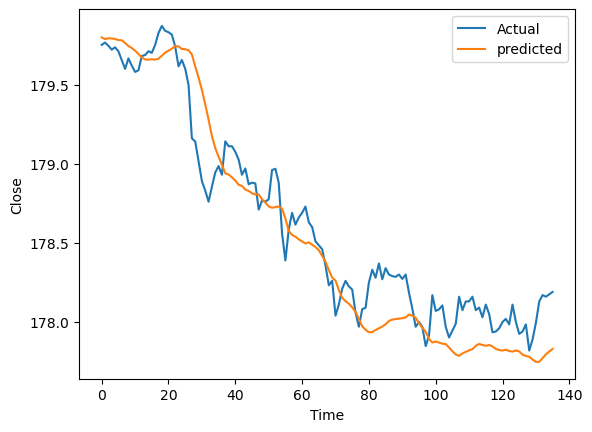

In [ ]:
plt.plot(new_y_test,label="Actual")
plt.plot(test_prediction,label='predicted')
plt.xlabel("Time")
plt.ylabel("Close")
plt.legend()
plt.show()

In [ ]:
torch.cuda.empty_cache()